In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("advertising.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [23]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [24]:
data.shape

(1000, 10)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

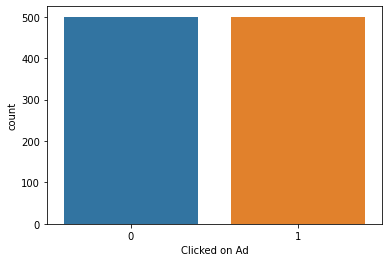

In [25]:
sns.countplot(x="Clicked on Ad",data=data)

# Remove/replace missing values

In [26]:
data.isnull().sum()>0

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

# Encoding categorical data

In [27]:
variables = ['Ad Topic Line', 'City', 'Country','Timestamp']
data[variables].describe()

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Vision-oriented multi-tasking success,Lisamouth,Czech Republic,2016-01-28 17:03:54
freq,1,3,9,1


As we can see from the table above that all the values in column "Ad Topic Line" and "Timestamp" are unique, while the "City" column contains 969 unique values out of 1000. There are too many unique elements within these two categorical columns and it is generally difficult to perform a prediction without the existence of a data pattern. 
Because of that, they will be omitted from further analysis. The third categorical variable, "Country", has a unique element (France) that repeats 9 times. Additionally, we can determine countries with the highest number of visitors

In [28]:
data = data.drop(['Ad Topic Line', 'City', 'Country','Timestamp'], axis=1)

In [29]:
X= data.drop(['Clicked on Ad'], axis=1)
y = data['Clicked on Ad']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)

In [31]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [32]:
#adding the input and first hidden layer
classifier = Sequential()

classifier.add(Dense(5, activation='relu',  kernel_initializer='glorot_uniform', input_dim=5))  
classifier.add(Dropout(0.2))

#classifier.add(Dense(output_dim=6, init='uniform', activation='rule',input_dim=10))  # output_dim = 9+1/2=5
#adding the second hidden layer
classifier.add(Dense(3, activation='relu', kernel_initializer='glorot_uniform'))
classifier.add(Dropout(0.2))

#adding the output layer
classifier.add(Dense(1, activation='sigmoid',  kernel_initializer='glorot_uniform'))

In [33]:
# output is in the form of binary(0 and 1), that's why we are using binary_crossentropy
classifier.compile(optimizer="Adam", loss='binary_crossentropy',metrics=['accuracy'])




In [34]:
classifier.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test,y_test),)

Epoch 1/100
11/11 [==============================] - 1s 25ms/step - loss: 0.9388 - accuracy: 0.3939 - val_loss: 0.9248 - val_accuracy: 0.3700
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 0.8796 - accuracy: 0.4081 - val_loss: 0.8724 - val_accuracy: 0.3700
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 0.8393 - accuracy: 0.4389 - val_loss: 0.8281 - val_accuracy: 0.3700
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.8025 - accuracy: 0.4456 - val_loss: 0.7912 - val_accuracy: 0.3833
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7597 - accuracy: 0.4660 - val_loss: 0.7618 - val_accuracy: 0.4033
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.7418 - accuracy: 0.4493 - val_loss: 0.7369 - val_accuracy: 0.4300
Epoch 7/100
11/11 [==============================] - 0s 13ms/step - loss: 0.7213 - accuracy: 0.4776 - val_loss: 0.7170 - val_accuracy: 0.4467
Epoch 8

In [35]:
from tensorflow.keras.models import load_model

In [36]:
classifier.save("advertising.h5")

In [37]:
losses = pd.DataFrame(classifier.history.history)

<AxesSubplot:>

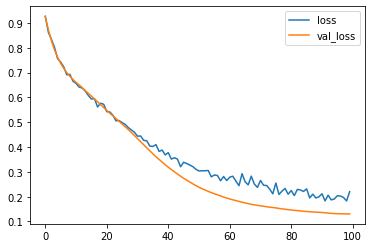

In [38]:
losses[['loss','val_loss']].plot()

In [39]:
#Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred> 0.5)



In [40]:
# Making confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,y_pred )
accurayscore = accuracy_score(y_pred,y_test)
print('Accuracy is:', accurayscore*100)
print('\nclassification report is:', classification_report(y_test,y_pred ))

Accuracy is: 97.33333333333334

classification report is:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       164
           1       0.98      0.96      0.97       136

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [41]:
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[161   3]
 [  5 131]]


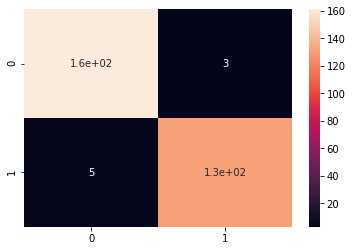

In [42]:

sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png')